In [1]:
from neural_network import NeuralNetwork
from sgd import SGD
from lr_schedulers import StepDecayScheduler
from grid_search import GridSearch
from grid_search import build_by_params

import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
#MONK PROBLEMS
def load_monks_problems():
    monks_trains={}
    monks_tr_targets={}

    monks_tests={}
    monks_ts_targets={}

    for i in ["1","2","3"]:
        path="../monks/monks"+i;
        train_set = np.genfromtxt(path+"-train.txt", delimiter=" ", dtype="int")[:,1:-1] #rimuove la colonna nan alla fine
        train_targets = np.genfromtxt(path+"-train.txt", delimiter=" ", dtype="int")[:,:1]
        monks_trains["monks"+i]=train_set
        monks_tr_targets["monks"+i]=train_targets

        test_set = np.genfromtxt(path+"-test.txt", delimiter=" ", dtype="int") [:,1:-1] #rimuove targets e colonna nan 
        test_targets = np.genfromtxt(path+"-test.txt", delimiter=" ", dtype="int") [:,0:1]
        monks_tests["monks"+i]=test_set
        monks_ts_targets["monks"+i]=test_targets
        
    return monks_trains, monks_tr_targets, monks_tests, monks_ts_targets

In [3]:
monks_trains, monks_tr_targets, monks_tests, monks_ts_targets = load_monks_problems()

In [4]:
#It creates the nn and starts grid searching
#Returns a list of tuples grid_results=[(accuracy, params, nn_layers)]

def compose_nn(dataset, targets, params, debug=False):
    grid_results=[]
    max_hidden_layers=5
    num_of_units=[5,10,15]

    for i_hidden_layers in range(1,max_hidden_layers, 1):
        for j_units in num_of_units:
            nn = NeuralNetwork()

            nn.add_layer('dense', j_units, 'sigmoid', dataset.shape[1])
            for h in range(2,i_hidden_layers+1,1):
                nn.add_layer('dense', j_units, 'sigmoid')
            nn.add_layer('dense', 1, 'sigmoid')
            
            gs = GridSearch(params, nn)
            
            l=[]
            for layer in nn.layers:
                l.append(layer.num_units)
            
            grid_results.append(tuple((gs.fit(dataset, targets), l)))
            
            if(debug==True):
                print(">layers: (", len(nn.layers),")", l)
                print(grid_results[-1])
    return grid_results

In [14]:
# --- parameters ---
param_grid = {
    'lr': [0.05, 0.1, 0.15, 0.2], 
    'epoch' : [1000, 2000, 3000],
    'patience': [100, 200, 300],
    'test_size': [0.25, 0.5],
    'batch_size': [16],
    
    'momentum': [0.7, 0.8, 0.9],
    'nesterov': [False]
}

In [15]:
#TEST WITH SMALL PARAM_GRID





#REMOVE IT 






#DON'T FORGET


    param_grid = {
        'lr': [0.15, 0.2], 
        'epoch' : [4000],
        'patience': [200],
        'test_size': [0.25, 0.5],
        'batch_size': [16],
        
        'momentum': [0.7, 0.8],
        'nesterov': [False]
    }

In [7]:
#start grids and save all results
results={}
which_monks=["1","2","3"]

for i in which_monks:
    print("monks"+i)
    x=monks_trains["monks"+i]
    y=monks_tr_targets["monks"+i]
    results["monks"+i]=compose_nn(x, y, param_grid, True)

monks1
>layers: ( 2 ) [5, 1]
((0.9354838709677419, {'batch_size': 16, 'epoch': 4000, 'lr': 0.2, 'momentum': 0.8, 'nesterov': False, 'patience': 200, 'test_size': 0.25}), [5, 1])
>layers: ( 2 ) [10, 1]
((0.8387096774193549, {'batch_size': 16, 'epoch': 4000, 'lr': 0.2, 'momentum': 0.8, 'nesterov': False, 'patience': 200, 'test_size': 0.25}), [10, 1])
>layers: ( 2 ) [15, 1]
((0.9354838709677419, {'batch_size': 16, 'epoch': 4000, 'lr': 0.15, 'momentum': 0.8, 'nesterov': False, 'patience': 200, 'test_size': 0.25}), [15, 1])
>layers: ( 3 ) [5, 5, 1]
((0.9032258064516129, {'batch_size': 16, 'epoch': 4000, 'lr': 0.15, 'momentum': 0.7, 'nesterov': False, 'patience': 200, 'test_size': 0.25}), [5, 5, 1])
>layers: ( 3 ) [10, 10, 1]
((1.0, {'batch_size': 16, 'epoch': 4000, 'lr': 0.2, 'momentum': 0.8, 'nesterov': False, 'patience': 200, 'test_size': 0.25}), [10, 10, 1])
>layers: ( 3 ) [15, 15, 1]
((1.0, {'batch_size': 16, 'epoch': 4000, 'lr': 0.2, 'momentum': 0.8, 'nesterov': False, 'patience': 200,

In [9]:
#get best results
best_results={}

for m in results:
    l=results[m]
    best=max(l, key=lambda x: x[0][0])
    best_results[m]=best

best_results

{'monks1': ((1.0,
   {'batch_size': 16,
    'epoch': 4000,
    'lr': 0.2,
    'momentum': 0.8,
    'nesterov': False,
    'patience': 200,
    'test_size': 0.25}),
  [10, 10, 1]),
 'monks2': ((0.7441860465116279,
   {'batch_size': 16,
    'epoch': 4000,
    'lr': 0.15,
    'momentum': 0.8,
    'nesterov': False,
    'patience': 200,
    'test_size': 0.25}),
  [10, 10, 10, 1]),
 'monks3': ((0.967741935483871,
   {'batch_size': 16,
    'epoch': 4000,
    'lr': 0.2,
    'momentum': 0.8,
    'nesterov': False,
    'patience': 200,
    'test_size': 0.25}),
  [5, 5, 5, 1])}

In [16]:
train_set=monks_trains["monks1"]
train_targets=monks_tr_targets["monks1"]
nn = NeuralNetwork()
nn.add_layer('dense', 10, 'sigmoid', train_set.shape[1]) #input layer
nn.add_layer('dense', 10, 'sigmoid') #input layer
nn.add_layer('dense', 1, 'sigmoid')
nn.compile(optimizer=SGD(lr_init=0.1, momentum=0.9, nesterov=False, lr_sched=StepDecayScheduler(drop=0.9, epochs_drop=20)))

nn.fit(train_set, train_targets, batch_size=8, test_size=0.3, epochs=5000, patience=200, save_stats="test")

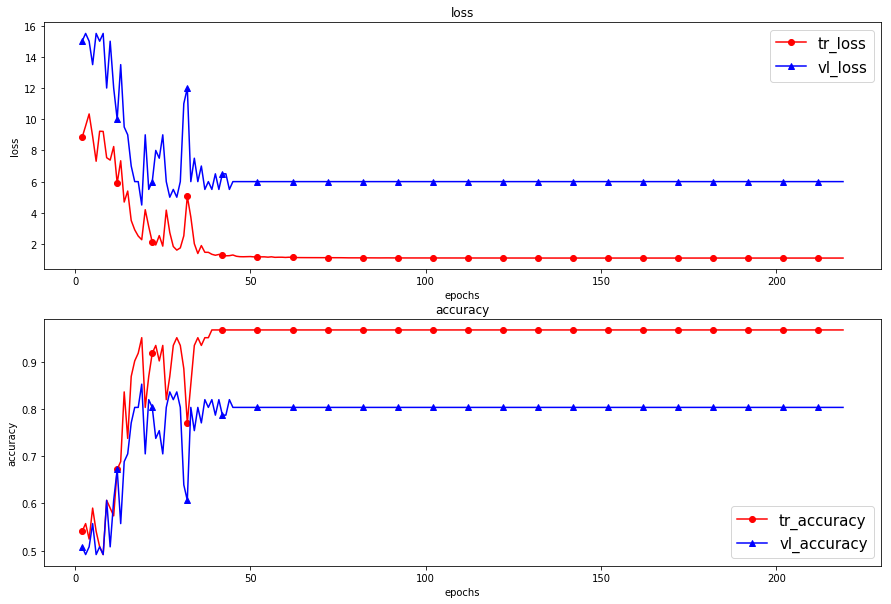

In [42]:
#graphs
tr_losses=np.load("gs_tr_loss.npy")
vl_losses=np.load("gs_vl_loss.npy")

tr_accuracies=np.load("gs_tr_accuracy.npy")
vl_accuracies=np.load("gs_vl_accuracy.npy")

plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.plot(range(2, len(tr_losses)+2), tr_losses, 'r-', marker="o", markevery=10, label="tr_loss")
plt.plot(range(2, len(vl_losses)+2), vl_losses, 'b-', marker="^", markevery=10, label="vl_loss")
#plt.xticks(np.arange(0, epochs, step=10))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("loss")
plt.legend(loc='best', fontsize=15)

plt.subplot(212)
plt.plot(range(2, len(tr_accuracies)+2), tr_accuracies, 'r-', marker="o", markevery=10, label="tr_accuracy")
plt.plot(range(2, len(vl_accuracies)+2), vl_accuracies, 'b-', marker="^", markevery=10, label="vl_accuracy")
#plt.xticks(np.arange(0, epochs, step=10))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("accuracy")
plt.legend(loc='best', fontsize=15)

In [7]:
'''
OLD CODE
# --- Parameters grid search ---
def params_grid_search(nn, dataset, target, params):
    best_accuracy=0
    grid = ParameterGrid(param_grid)

    for params in grid:
        nn.compile(optimizer=SGD(lr_init=params['lr'], momentum=params['momentum'], nesterov=False, lr_sched=StepDecayScheduler(epochs_drop=15)))
        model=nn.fit(dataset, target, batch_size=params['batch_size'], test_size=params['test_size'], epochs=params['epoch'], patience=params['patience'], save_stats=True) #lr=0.05 test_size=0.5 epochs=2000

        accuracy=np.amax(np.load("vl_accuracy.npy"))
        if(accuracy > best_accuracy):
            best_accuracy=accuracy
            best_param={x:params[x] for x in list(param_grid.keys())}
            
    return best_accuracy, best_param

# --- Layer/Unit pseudo grid search ---
def grid_search(dataset, target, params, debug=False):
    grid_results=[];
    max_hidden_layers=5
    num_of_units=[5,10,15]

    for i_hidden_layers in range(1,max_hidden_layers, 1):
        for j_units in [5,10,15]:
            nn = NeuralNetwork()

            nn.add_layer('dense', j_units, 'sigmoid', dataset.shape[1])
            for h in range(2,i_hidden_layers+1,1):
                nn.add_layer('dense', j_units, 'sigmoid')
            nn.add_layer('dense', 1, 'sigmoid')
            
            grid_results.append(params_grid_search(nn, dataset, target, params))
            if(debug==True):
                l=[]
                for layer in nn.layers:
                    l.append(layer.num_units)
                print(">layers: (", len(nn.layers),")", l)
                print(grid_results[-1])
    return grid_results
'''

In [5]:
with open('best_monks1.pkl', 'rb') as inputfile:
     best_model = pickle.load(inputfile)

In [7]:
print("layers ", len(best_model.layers))
print("nodes ", end=' ')
for l in best_model.layers:
    print(l.num_units, end=' ')
print()
print()
print("momentum ", best_model.optimizer.momentum)
print("nesterov ", best_model.optimizer.nesterov)
print()
print("lr_init ", best_model.optimizer.lr_init)
print("lr_final ", best_model.optimizer.lr)
print()
print("lr_sched ", best_model.optimizer.lr_sched)
print("drop ", best_model.optimizer.lr_sched.drop)
print("epochs_drop ", best_model.optimizer.lr_sched.epochs_drop)

layers  3
nodes  10 10 1 

momentum  0.9
nesterov  False

lr_init  0.1
lr_final  0.08100000000000002

lr_sched  <lr_schedulers.StepDecayScheduler object at 0x7f77e1a95b70>
drop  0.9
epochs_drop  20


In [ ]:
{'monks1': ((1.0,
   {'batch_size': 16,
    'epoch': 4000,
    'lr': 0.2,
    'momentum': 0.8,
    'nesterov': False,
    'patience': 200,
    'test_size': 0.25}),
  [10, 10, 1]),

In [31]:
#reconstruct nn
for monk in ["monks1", "monks2", "monks3"]:
    print(monk)
    
    train_set=monks_trains[monk]
    train_targets=monks_tr_targets[monk]
    nn = NeuralNetwork()

    for i in range(0,len(best_model.layers)):
        if i==0:
            nn.add_layer('dense', best_model.layers[i].num_units, 'sigmoid', train_set.shape[1]) #input layer
        else:
            nn.add_layer('dense', best_model.layers[i].num_units, 'sigmoid')

    nn.compile(optimizer=SGD(lr_init=0.2, momentum=0.8, nesterov=False, lr_sched=StepDecayScheduler(epochs_drop=15)))
    nn.fit(train_set, train_targets, batch_size=16, test_size=0.25, epochs=5000, patience=200, verbose=True)#save_pred="pred_"+monk)

monks1
accuracy improved at epoch 1 :  0.5
accuracy improved at epoch 2 :  0.6
accuracy improved at epoch 3 :  0.7
accuracy improved at epoch 37 :  0.7333333333333333
monks2
accuracy improved at epoch 1 :  0.38095238095238093
accuracy improved at epoch 2 :  0.6190476190476191
accuracy improved at epoch 45 :  0.6428571428571429
accuracy improved at epoch 58 :  0.6904761904761905
accuracy improved at epoch 67 :  0.7142857142857143
monks3
accuracy improved at epoch 1 :  0.5666666666666667
accuracy improved at epoch 4 :  0.6333333333333333
accuracy improved at epoch 5 :  0.7666666666666667
accuracy improved at epoch 8 :  0.8333333333333334
accuracy improved at epoch 14 :  0.8666666666666667
accuracy improved at epoch 68 :  0.9


In [5]:
layers = [(10,10,1), (5,5,1)]

param_grid = {
    'layers': layers,
    'activation': ['sigmoid'],
    'lr': [0.001, 0.0005, 0.0001],
    'l2_lambda': [None],
    'epoch': [5000],
    'patience': [200],
    'test_size': [0.3],
    'batch_size': [64, 8],
    'momentum': [0.9],
    'dropout': [None, [0.5, 0.5, 0.5]],
    'nesterov': [False],
    'lr_sched': [(1, 1), (0.7, 50), (0.9, 100)]
}

train_set=monks_trains["monks2"]
train_targets=monks_tr_targets["monks2"]

In [29]:
gs = GridSearch(task='Classification', tuning_params=param_grid, restarts=10, folds=0)
gs.fit(train_set, train_targets, checkpoints='monk_grid_new')

[{'params': {'activation': 'sigmoid',
   'batch_size': 64,
   'dropout': None,
   'epoch': 5000,
   'l2_lambda': None,
   'layers': (10, 10, 1),
   'lr': 0.001,
   'lr_sched': (1, 1),
   'momentum': 0.9,
   'nesterov': False,
   'patience': 200,
   'test_size': 0.3},
  'vl_stats': [[0.17, 0.66]],
  'tr_stats': [[0.1093291752619614, 0.6218487394957983]]},
 {'params': {'activation': 'sigmoid',
   'batch_size': 64,
   'dropout': None,
   'epoch': 5000,
   'l2_lambda': None,
   'layers': (10, 10, 1),
   'lr': 0.001,
   'lr_sched': (0.7, 50),
   'momentum': 0.9,
   'nesterov': False,
   'patience': 200,
   'test_size': 0.3},
  'vl_stats': [[0.16, 0.68]],
  'tr_stats': [[0.12683573594850706, 0.5126050420168067]]},
 {'params': {'activation': 'sigmoid',
   'batch_size': 64,
   'dropout': None,
   'epoch': 5000,
   'l2_lambda': None,
   'layers': (10, 10, 1),
   'lr': 0.001,
   'lr_sched': (0.9, 100),
   'momentum': 0.9,
   'nesterov': False,
   'patience': 200,
   'test_size': 0.3},
  'vl_stat

In [4]:
train_set=monks_trains["monks2"]
train_targets=monks_tr_targets["monks2"]

param_grid = {
    'layers': (5,5,1),
    'activation': 'sigmoid',
    'lr': 0.0005,
    'l2_lambda': None,
    'epoch': 5000,
    'patience': 200,
    'test_size': 0.3,
    'batch_size': 8,
    'momentum': 0.9,
    'dropout': [0.5, 0.5, 0.5],
    'nesterov': False,
    'lr_sched': (0.9, 100)
}
nn = build_by_params(task='Classification', params=param_grid, input_size=train_set.shape[0])

In [7]:
param_grid['dropout']

[0.5, 0.5, 0.5]